In [1]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl 

mpl.rcParams['figure.dpi'] = 400

df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
df['default payment next month'].mean()

0.2217971797179718

In [4]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,test_size=0.2, random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='auto',n_jobs=None, penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)

In [7]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [8]:
y_pred_proba = example_lr.predict_proba(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [9]:
metrics.roc_auc_score(y_test, y_pred_proba[:,1])

0.6201990844642832

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

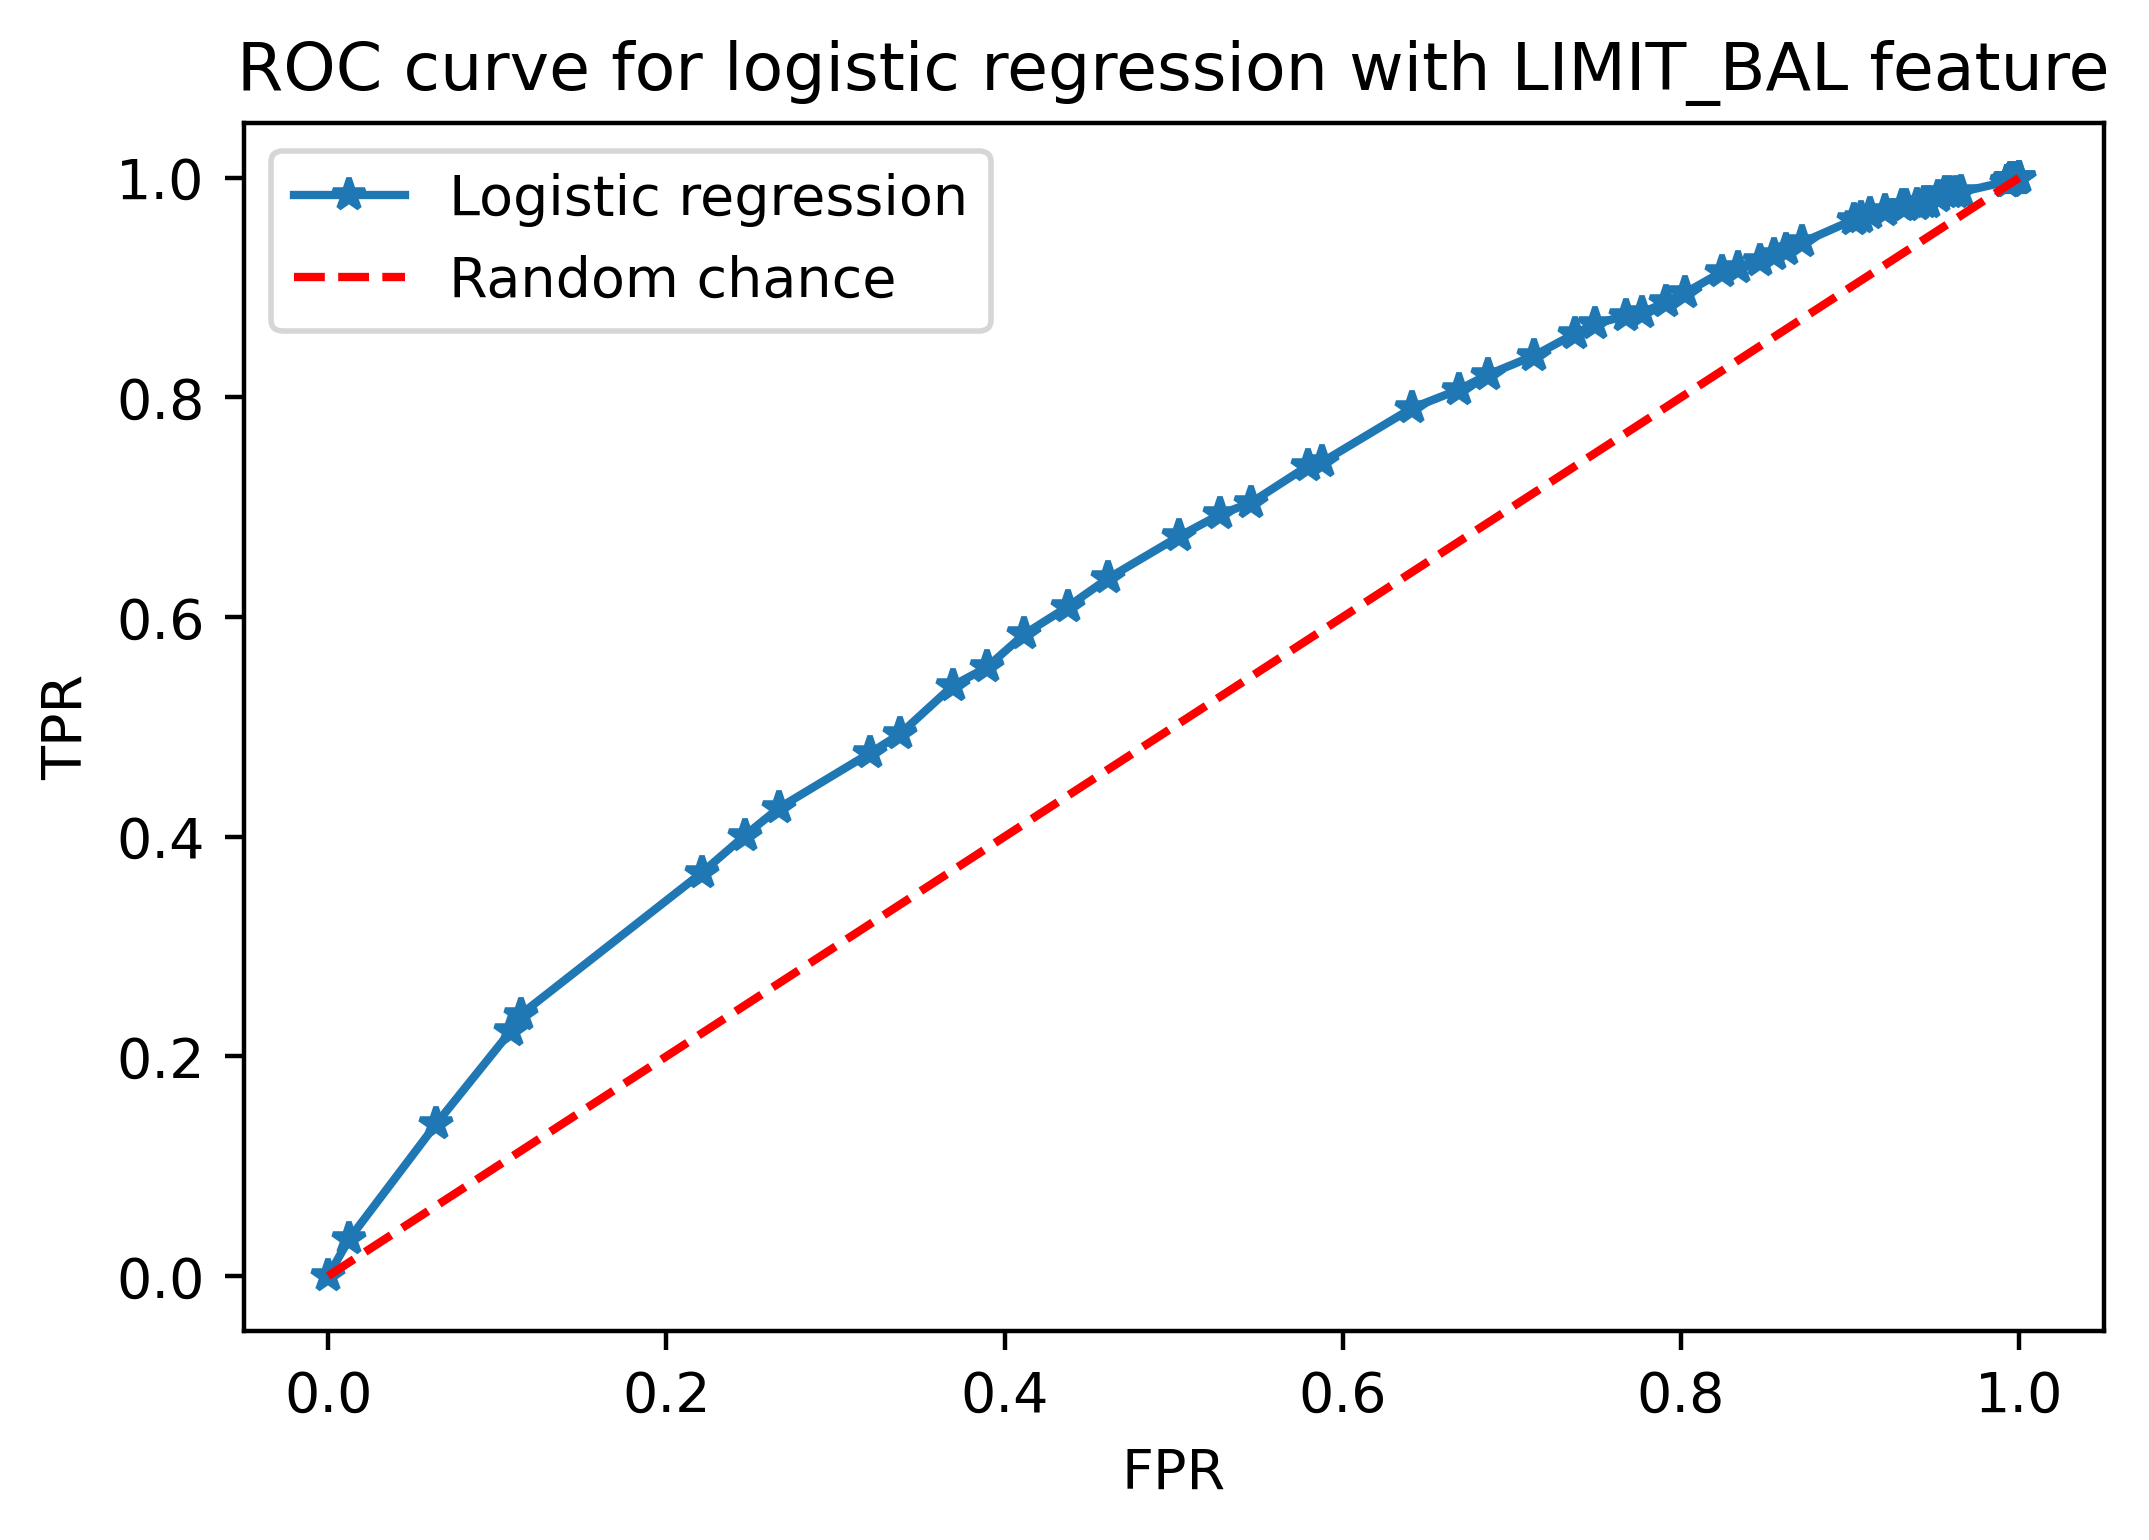

In [11]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [12]:
precision, recall, thresh = metrics.precision_recall_curve(y_test, y_pred_proba[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0.0, 1.0)

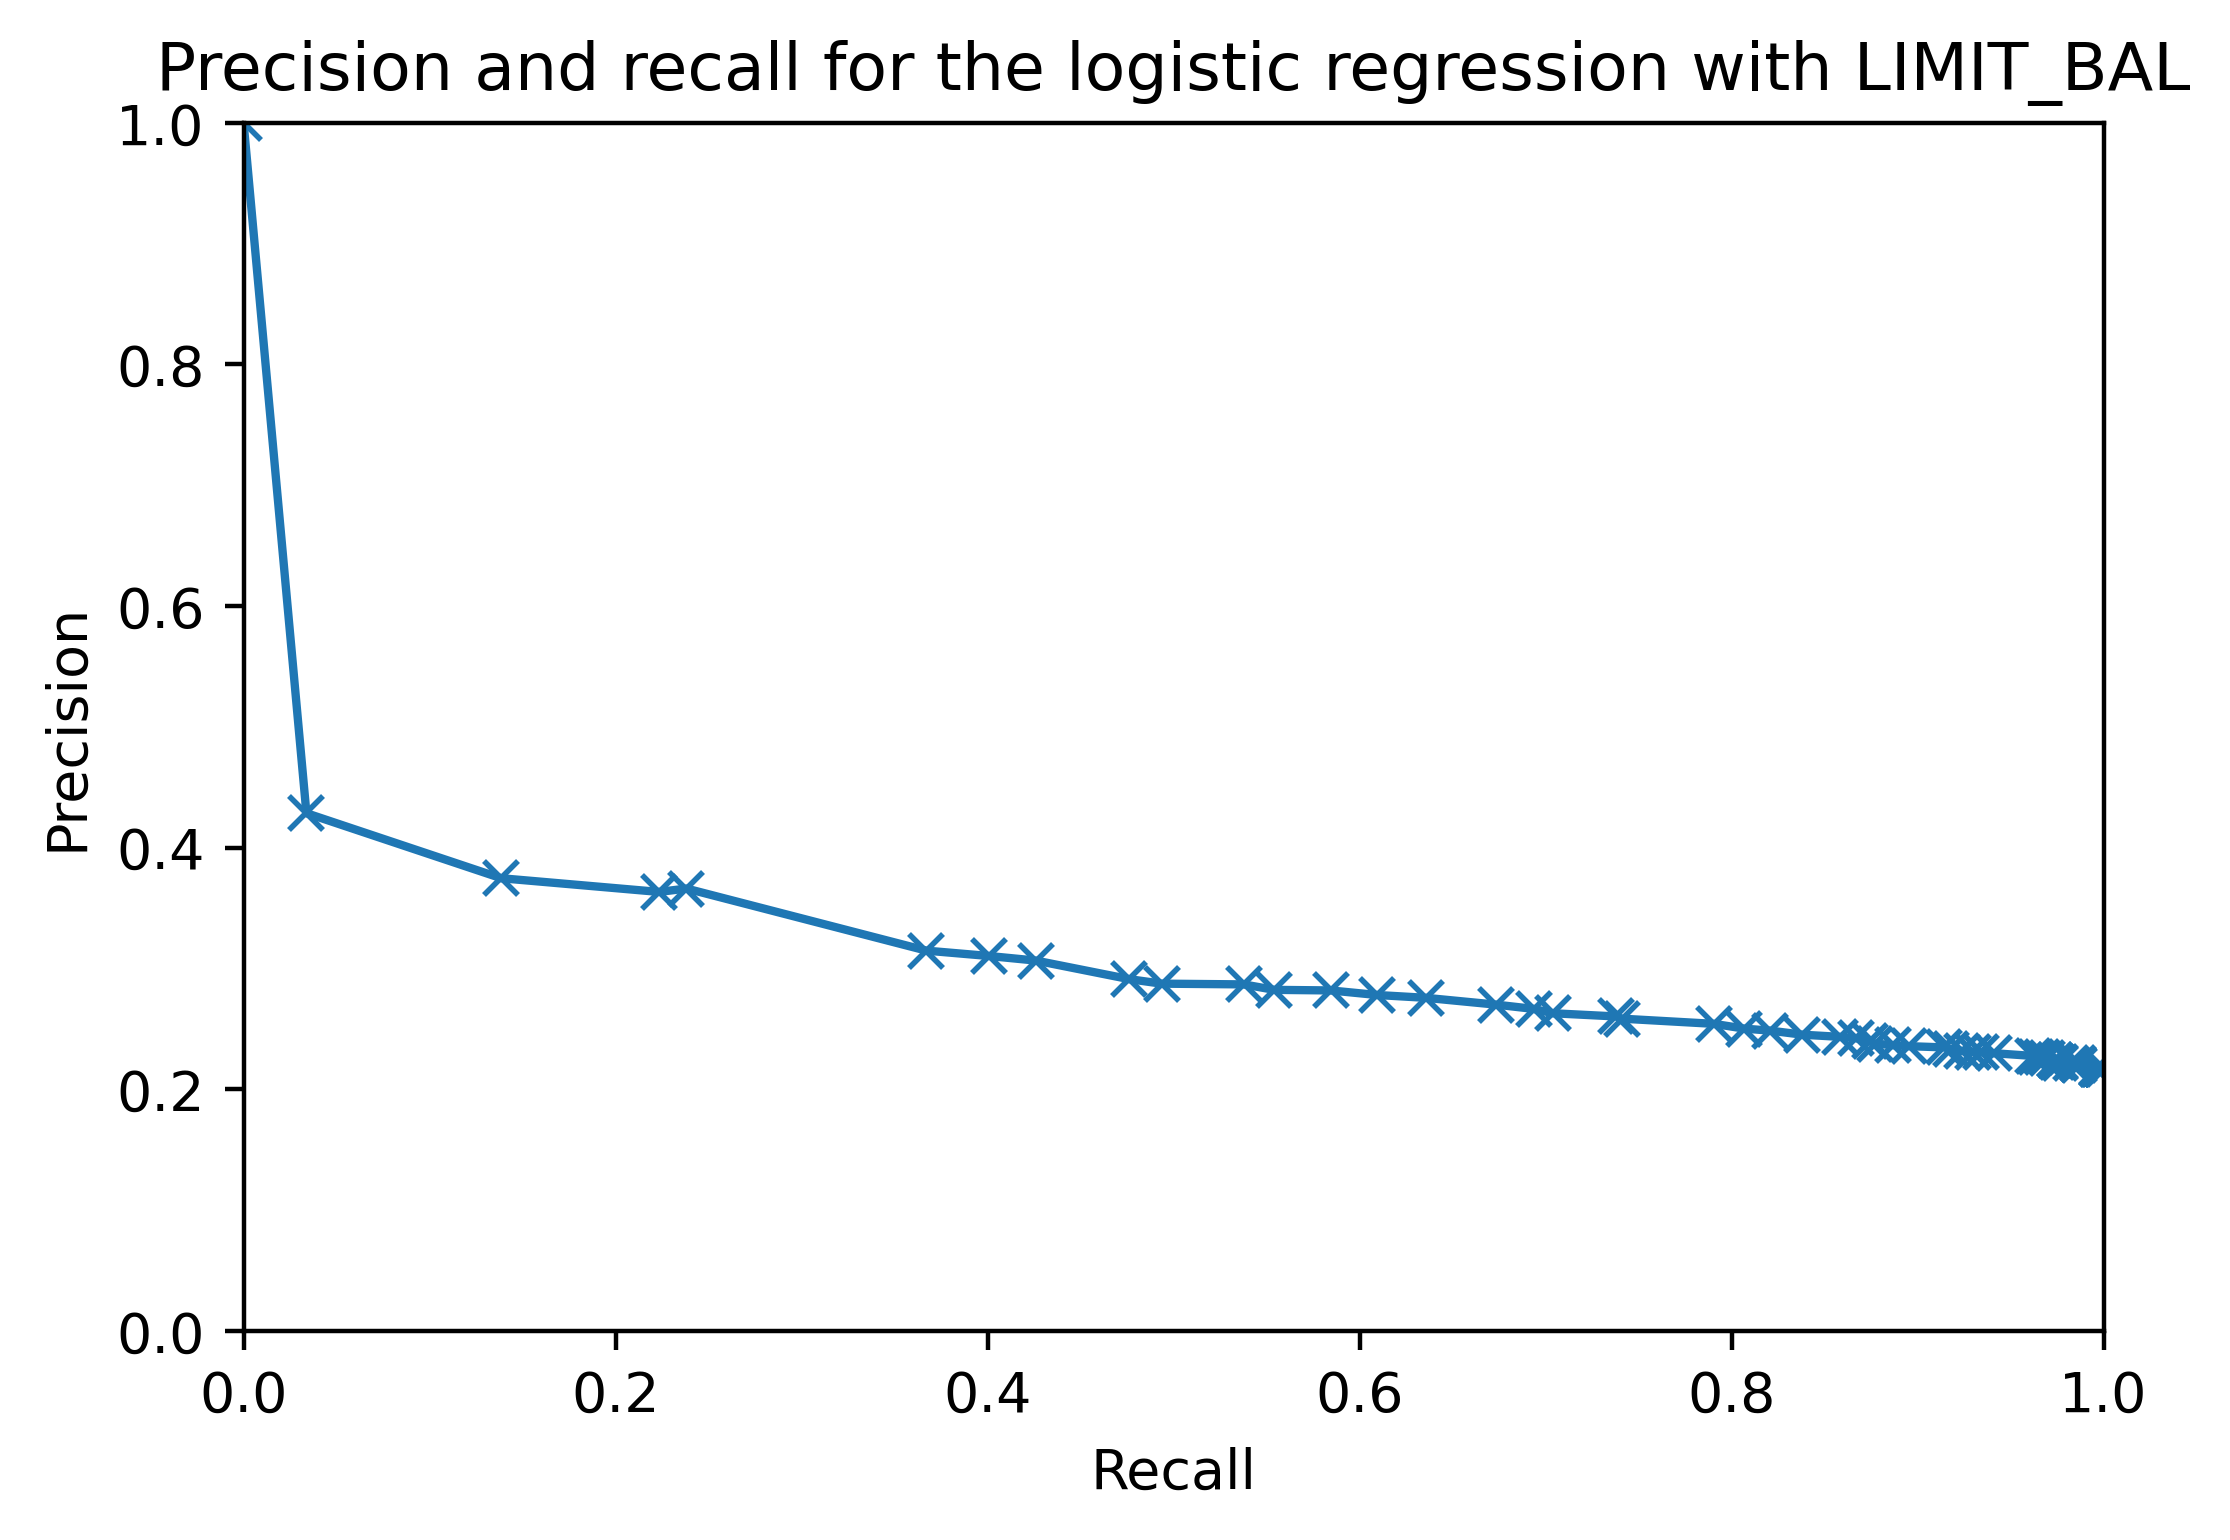

In [13]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [14]:
metrics.auc(recall, precision)

0.31566964427378624

In [15]:
y_train_pred_proba = example_lr.predict_proba(X_train)

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [16]:
metrics.roc_auc_score(y_train, y_train_pred_proba[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?
